<span style="color:green">Exploratory Data Analysis for only the weather.</span>


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
weather_belgium = pd.read_csv('hourly_weather_data.csv')

print(weather_belgium.isnull().sum())

temp        0
dwpt        0
rhum        0
prcp        0
snow        0
wdir        0
wspd        0
pres        0
Province    0
date        0
hour        0
dtype: int64


The dataset contains no null values

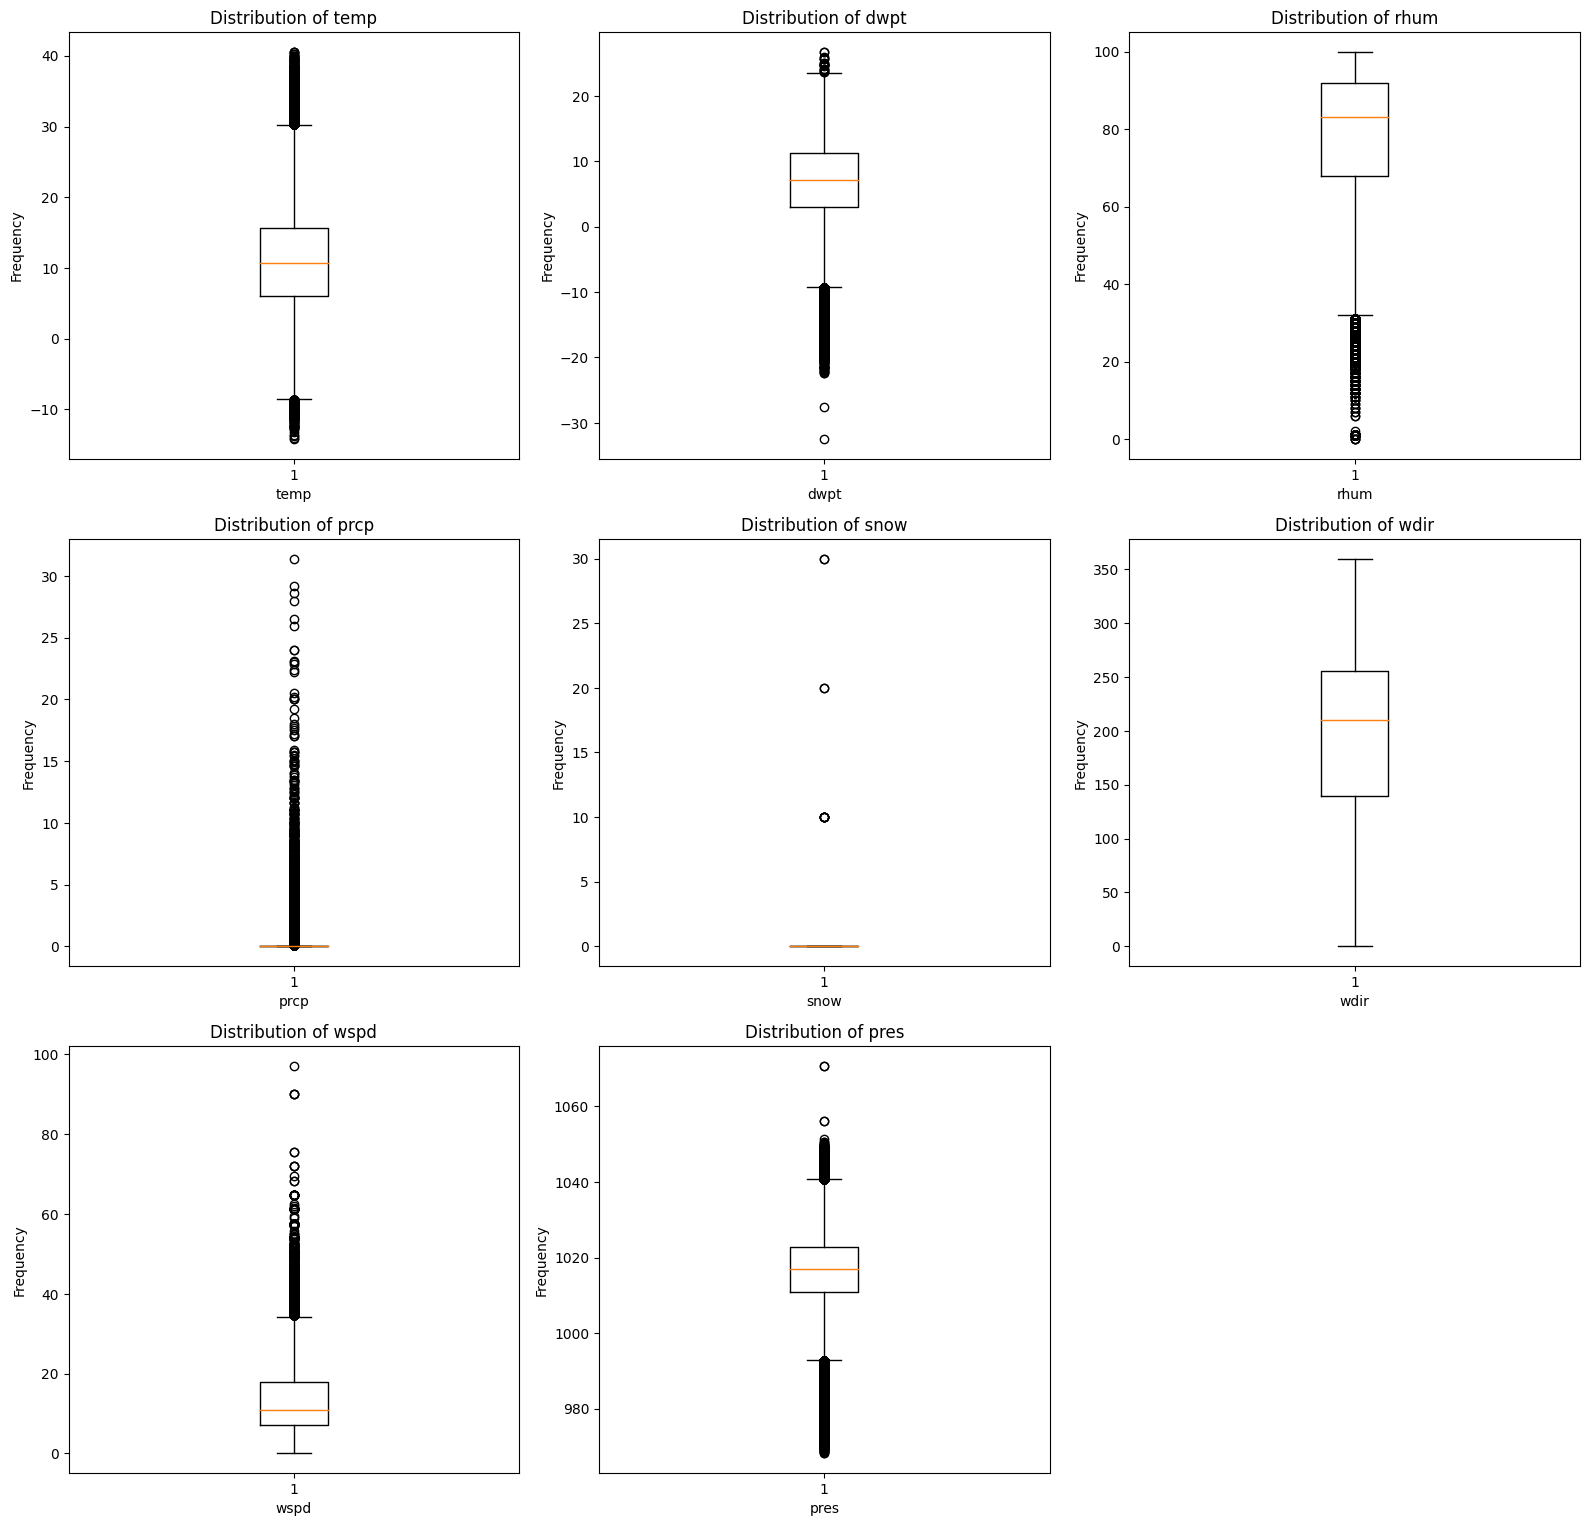

In [14]:
fig, axs = plt.subplots(4, 3, figsize=(16, 20))
axs = axs.flatten() 

for i, column in enumerate(weather_belgium.columns):
    if i == 8:
        break
    axs[i].boxplot(weather_belgium[column])
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
for i in range(8, 12):
    axs[i].set_visible(False)
    
plt.tight_layout()
plt.show()

Some values are a bit higher than the rest but nothing too egregious outlier removal won't be needed

In [6]:
date2014 = weather_belgium[["date", "hour"]]
province = weather_belgium["Province"]

weather_belgium = weather_belgium.drop(["date", "hour", "Province"], axis=1)

def quartiles_method(Data):
    Data = Data.apply(pd.to_numeric, errors='coerce')

    for column in Data.columns:
        tempo = Data[column]
        q1 = tempo.quantile(0.25)
        q3 = tempo.quantile(0.75)
        lower = q1 - 1.5 * (q3 - q1)
        upper = q3 + 1.5 * (q3 - q1)
        Data = Data[Data[column] >= lower] 
        Data = Data[Data[column] <= upper]
    return Data

# Doing a Z-score method to remove the outliers
def zscore_method(Data):
    Data = Data.apply(pd.to_numeric, errors='coerce')
    z = np.abs((Data - Data.mean()) / Data.std())
    Data = Data[(z < 3).all(axis=1)]
    return Data

weather_belgium_quartiles = quartiles_method(weather_belgium)

weather_belgium_zscore = zscore_method(weather_belgium)

print(f"Initial shape :",weather_belgium.shape)

print(f"Shape with quartiles :",weather_belgium_quartiles.shape)

print(f"Shape with Z-scores :",weather_belgium_zscore.shape)



Initial shape : (1052312, 8)
Shape with quartiles : (908522, 8)
Shape with Z-scores : (1009060, 8)


Comparing those 2 methods for outlier removals, the z-score will be chosen as the quartile method removes more than half of the dataset which is way too much

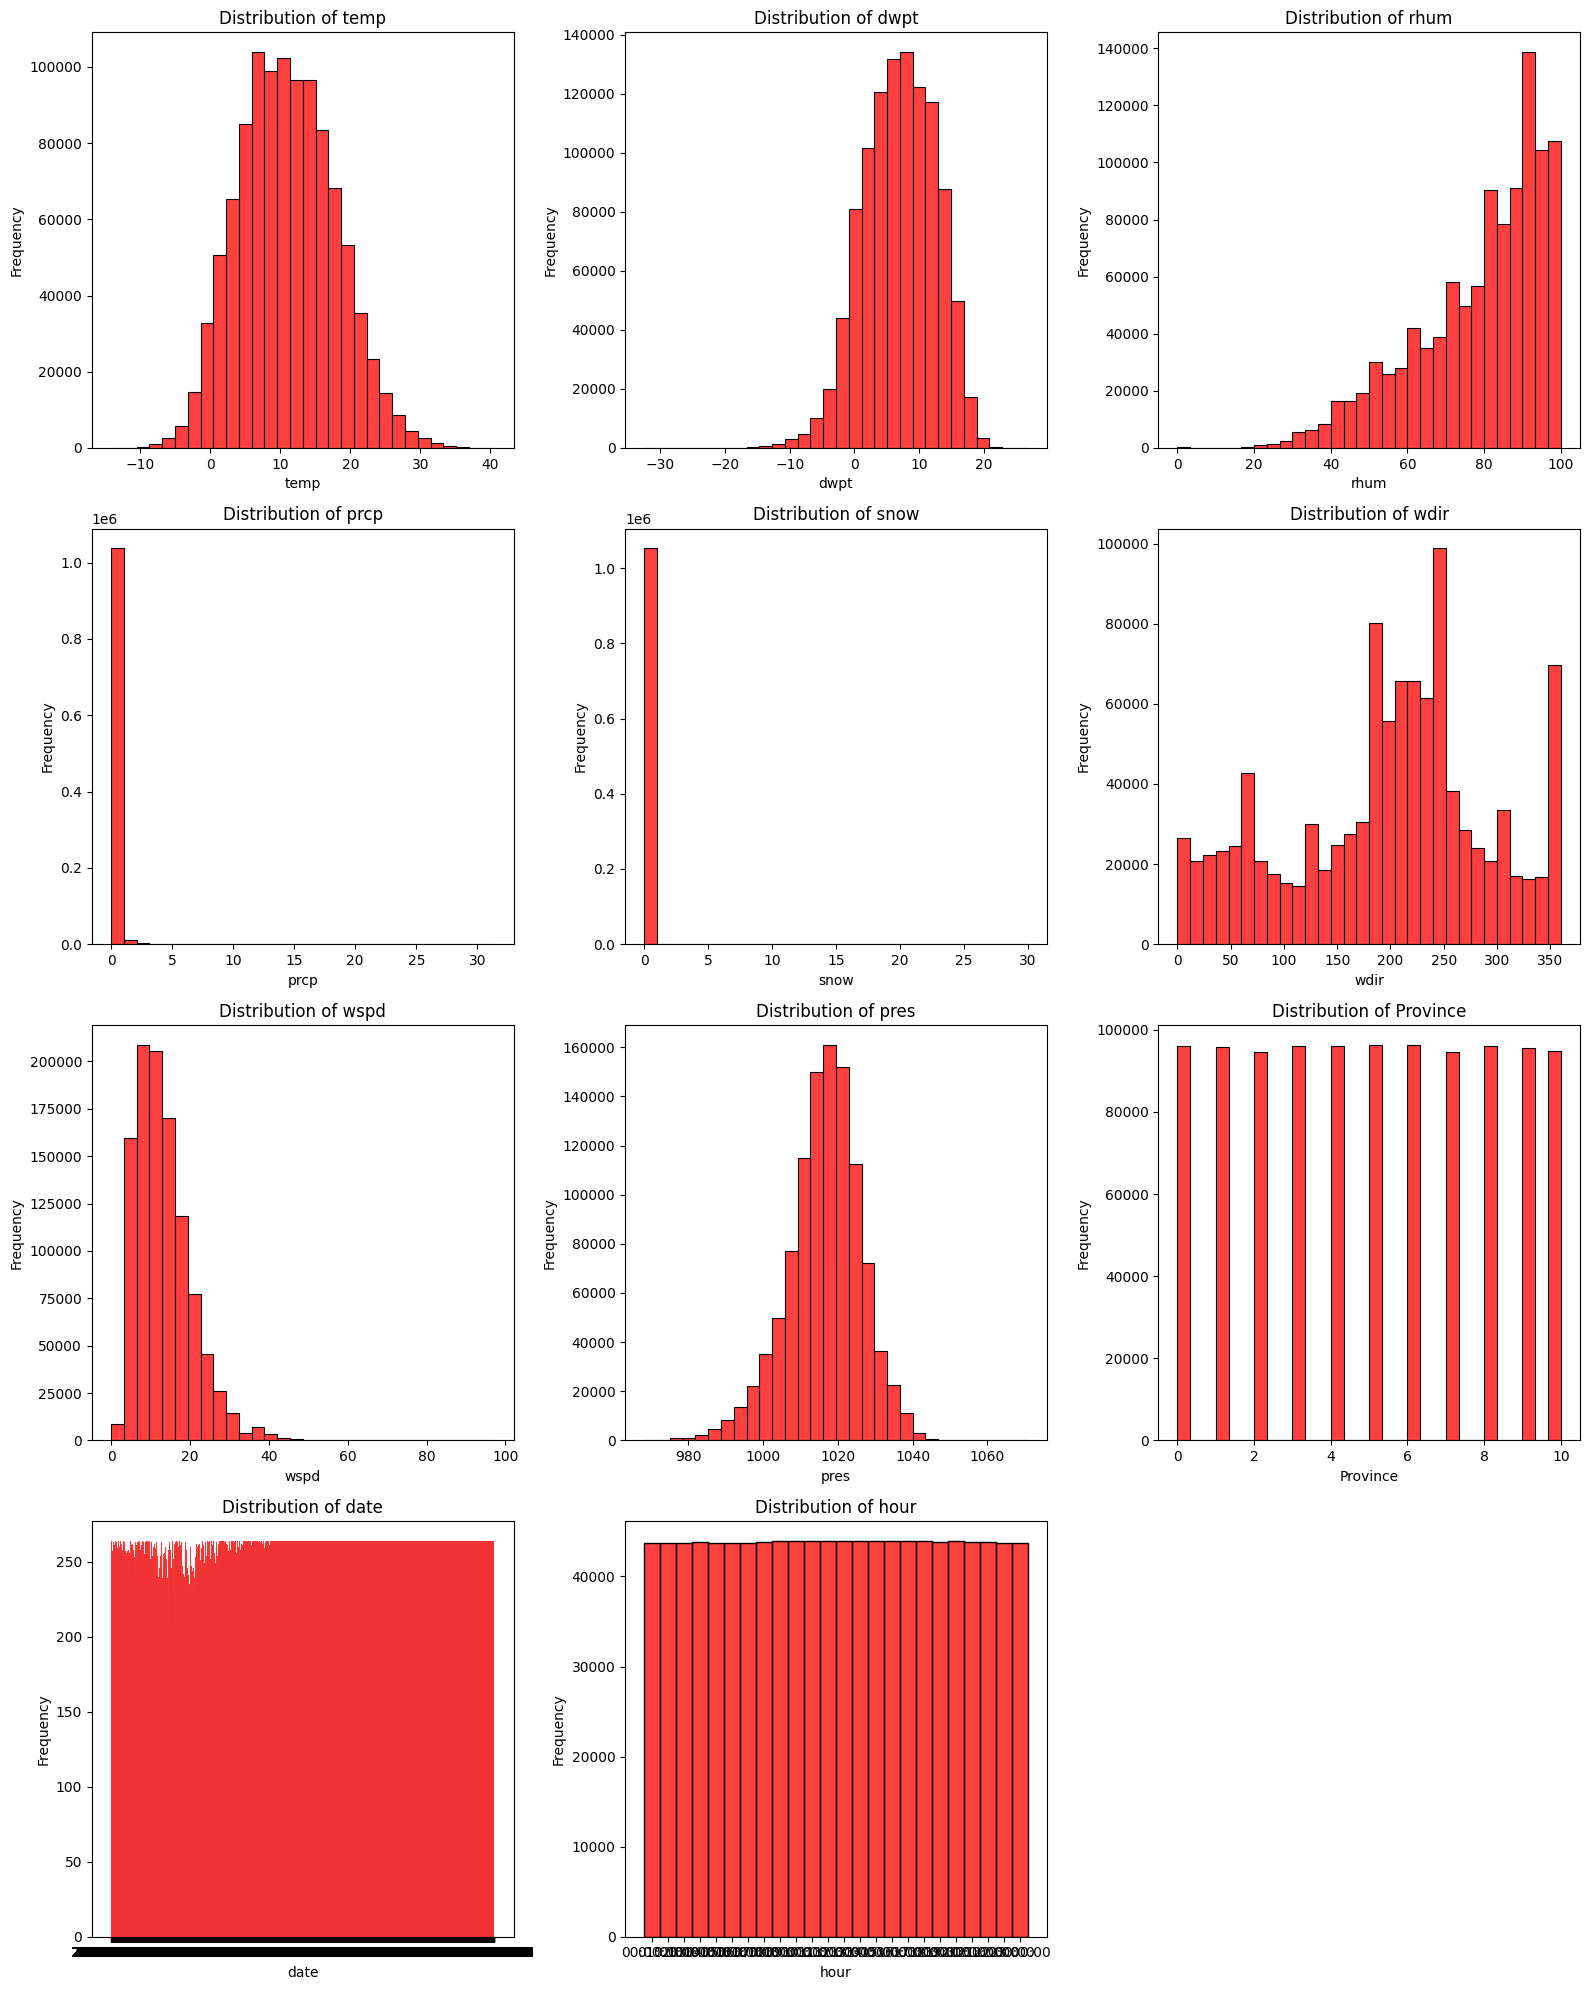

In [19]:
fig, axs = plt.subplots(4, 3, figsize=(16, 20))
axs = axs.flatten() 

for i, column in enumerate(weather_belgium.columns):
    sns.histplot(weather_belgium[column], ax=axs[i], bins = 30, color = 'r')
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
for i in range(11, 12):
    axs[i].set_visible(False)
    
plt.tight_layout()
plt.show()

In [24]:
weather_belgium.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,pres,Province
count,1.052312e+06,1.052312e+06,1.052312e+06,1.052312e+06,1.052312e+06,1.052312e+06,1.052312e+06,1.052312e+06,1.052312e+06
mean,1.095780e+01,6.943750e+00,7.873118e+01,5.446607e-02,1.615490e-04,1.966464e+02,1.294101e+01,1.016379e+03,4.994420e+00
std,6.853778e+00,5.569531e+00,1.671772e+01,3.308571e-01,5.599937e-02,9.373834e+01,7.642708e+00,9.822212e+00,3.159647e+00
min,-1.420000e+01,-3.250000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.682000e+02,0.000000e+00
25%,6.000000e+00,3.000000e+00,6.800000e+01,0.000000e+00,0.000000e+00,1.400000e+02,7.200000e+00,1.010800e+03,2.000000e+00
50%,1.070000e+01,7.100000e+00,8.300000e+01,0.000000e+00,0.000000e+00,2.100000e+02,1.080000e+01,1.017000e+03,5.000000e+00
75%,1.570000e+01,1.120000e+01,9.200000e+01,0.000000e+00,0.000000e+00,2.560000e+02,1.800000e+01,1.022800e+03,8.000000e+00
max,4.060000e+01,2.680000e+01,1.000000e+02,3.140000e+01,3.000000e+01,3.600000e+02,9.720000e+01,1.070800e+03,1.000000e+01


The variables have different scales, there are percentages for the relative_humidity and cloud_covers, other have very low values like precipitation, but overall the differences in value are not too high.

C:\Users\Manuel\AppData\Local\Temp\ipykernel_19640\1606466025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = weather_belgium.corr()


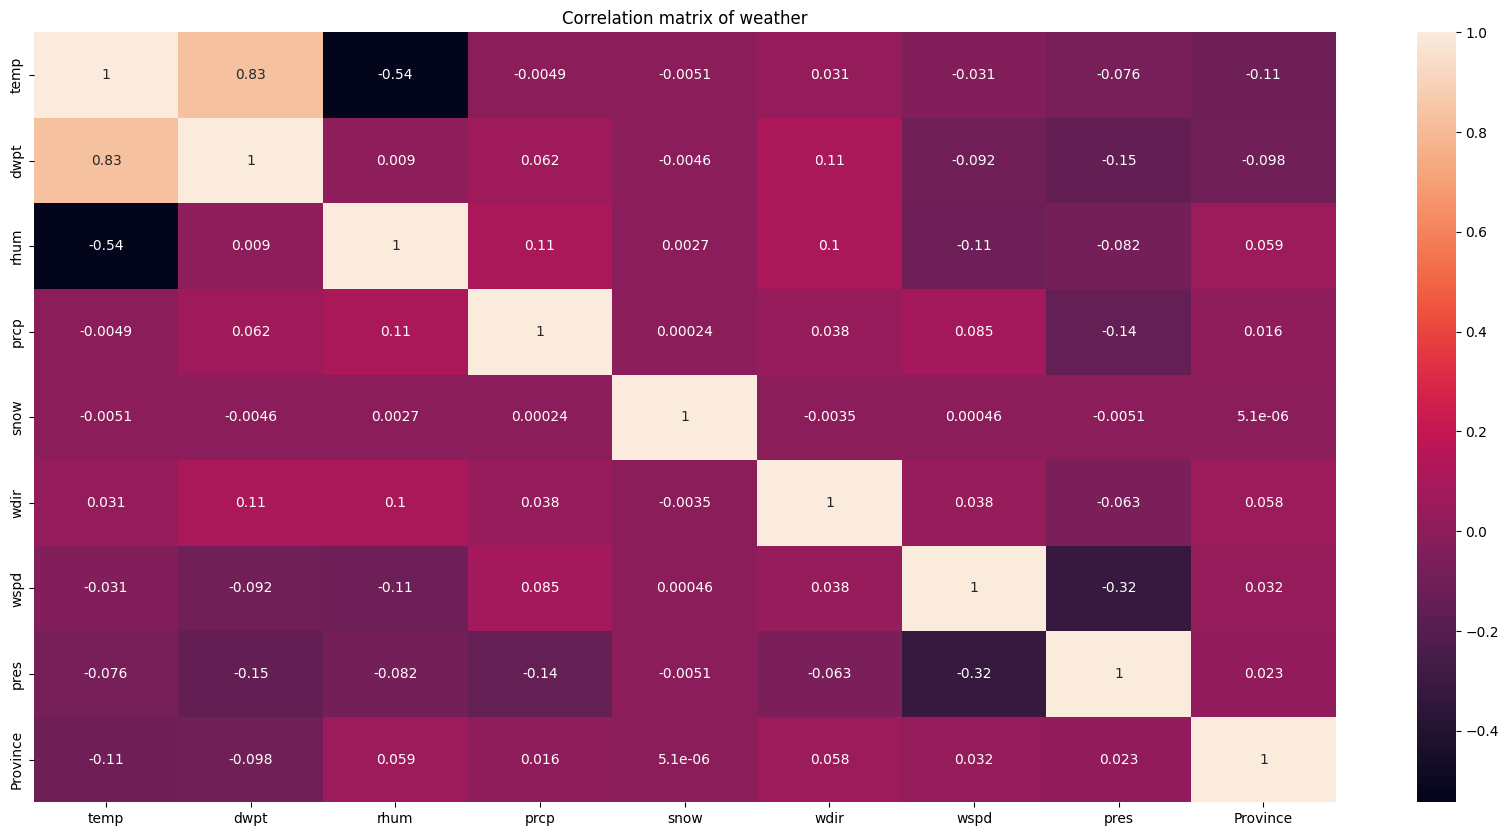

In [20]:
correlation_matrix = weather_belgium.corr()

fig  = plt.figure(figsize=(21, 10))
sns.heatmap(correlation_matrix, annot=True,)
plt.title('Correlation matrix of weather')
plt.show()

Some unexpected results are that relative_humidity is more correlated to temperature than precipitation. Also low correlations for the provinces may indicate that the weather is fairly similar everywhere in belgium.

In [23]:
# Apply describe() for each province
province_descriptions = {province: data.describe() for province, data in weather_belgium.groupby("Province")}

for province, stats in province_descriptions.items():
    print(f"Statistics for Province {province}:")
    print(stats)
    print("\n" + "-" * 50 + "\n")


Statistics for Province 0:
               temp          dwpt          rhum          prcp     snow  \
count  96074.000000  96074.000000  96074.000000  96074.000000  96074.0   
mean      11.581210      7.245628     77.454670      0.039061      0.0   
std        6.734481      5.454434     17.605939      0.295955      0.0   
min       -8.700000    -17.100000     13.000000      0.000000      0.0   
25%        6.600000      3.300000     66.000000      0.000000      0.0   
50%       11.200000      7.400000     82.000000      0.000000      0.0   
75%       16.300000     11.400000     92.000000      0.000000      0.0   
max       39.500000     25.900000    100.000000     28.000000      0.0   

               wdir          wspd          pres  Province  
count  96074.000000  96074.000000  96074.000000   96074.0  
mean     189.260955     12.680942   1016.045943       0.0  
std       86.614868      6.775130      9.869325       0.0  
min        0.000000      0.000000    969.900000       0.0  
25%   